
![Py4Eng](img/logo.png)

# Plotting with Python: Matplotlib
## Yoav Ram

<a href="http://matplotlib.org" target="_blank"><img src="http://matplotlib.org/_static/logo2.svg" alt="Matplotlib logo" width="500px"/></a>

The mathematician [Richard Hamming](http://en.wikipedia.org/wiki/Richard_Hamming) once said, **"The purpose of computing is insight, not numbers"**, and the best way to develop insight is often to visualize data. While there is no "official" plotting library, *matplotlib* is the _de facto_ standard. 

From Wikipedia:
> matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits... There is also a procedural "pylab" interface... designed to closely resemble that of **MATLAB**.

> The pylab interface makes matplotlib easy to learn for experienced MATLAB users, making it a viable alternative to MATLAB as a teaching tool for numerical mathematics and signal processing.
> Some of the advantages of the combination of Python, NumPy, and matplotlib over MATLAB include:
> -  Based on Python, a full-featured modern object-oriented programming language suitable for large-scale software development
> - Free, open source, no license servers
> - Native SVG support

## Anatomy of Matplotlib

This follows the [Anatomy of Matplotlib](https://github.com/WeatherGod/AnatomyOfMatplotlib) tutorial by [Benjamin Root](https://github.com/WeatherGod).

People use "plot" to mean many different things. Here, we'll be using a consistent terminology (mirrored by the names of the underlying classes, etc):

![Plot anatomy](https://raw.githubusercontent.com/yoavram/AnatomyOfMatplotlib/master/images/figure_axes_axis_labeled.png)

The Figure is the top-level container in this hierarchy. It is the overall window/page that everything is drawn on. You can have multiple independent figures and Figures can contain multiple Axes.

Most plotting ocurs on an Axes. The axes is effectively the area that we plot data on and any ticks/labels/etc associated with it. Usually we'll set up an Axes with a call to subplot (which places Axes on a regular grid), so in most cases, Axes and Subplot are synonymous.

Each Axes has an XAxis and a YAxis. These contain the ticks, tick locations, labels, etc. In this tutorial, we'll mostly control ticks, tick labels, and data limits through other mechanisms, so we won't touch the individual Axis part of things all that much. However, it's worth mentioning here to explain where the term Axes comes from.

First, let's tell the notebook that we want our plots displayed inline, rather than in a separate viewing window. This command will also import many other useful scientific python functions and modules, including NumPy:

In [1]:
%matplotlib?

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
print("Matplotlib version:", mpl.__version__)

Matplotlib version: 1.5.1


The `inline` part was to tell the notebook to use Matplotlib's `nbagg` backend, which work good with the notebook (hence the `nb` in `nbagg`). There are other backends, such as those used for web and for GUI. You can also set it to `notebook` instead of `inline` if you want the figure toolbar, similar to MATLAB.

For this tutorial we didn't need to import `matplotlib`, we just imported it to get the version.

### Figures

Now let's create a figure...

In [3]:
fig = plt.figure()

Awww, nothing happened! This is because we didn't plot anything or created any axes.

### Axes

All plotting is done with respect to an `Axes`. An `Axes` is made up of Axis objects and many other things. An `Axes` object must belong to a `Figure` (and only one `Figure`). Most commands you will ever issue will be with respect to this `Axes` object.

Typically, you'll set up a `Figure`, and then add an `Axes` to it.

You can use `fig.add_axes`, but in most cases, you'll find that adding a subplot will fit your needs perfectly. (Again a "subplot" is just an axes on a grid system.)

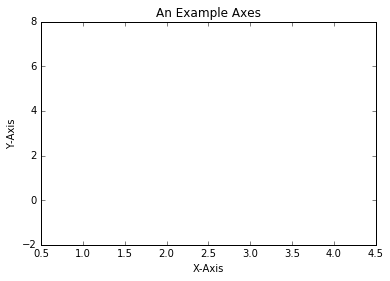

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title='An Example Axes', ylabel='Y-Axis', xlabel='X-Axis')
plt.show()

You can control the size of the figure through the `figsize` argument, which expects a tuple of `(width, height)` in inches.

A really useful utility function is `figaspect`:

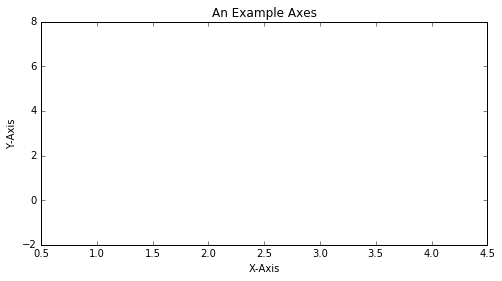

In [5]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(111)
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title='An Example Axes', ylabel='Y-Axis', xlabel='X-Axis')
plt.show()

Notice the call to `set`. Matplotlib's objects typically have lots of "explicit setters" -- in other words, functions that start with `set_<something>` and control a particular option.

To demonstrate this (and as an example of IPython's tab-completion), try typing `ax.set_` in a code cell, then hit the `<Tab>` key. You'll see a long list of `Axes` methods that start with `set`.

For example, we could have written the third line above as
```py
ax.set_xlim([0.5, 4.5])
ax.set_ylim([-2, 8])
ax.set_title('An Example Axes')
ax.set_ylabel('Y-Axis')
ax.set_xlabel('X-Axis')
```

Clearly this can get repitive quickly. Therefore, Matplotlib's `set` method can be very handy. It takes each kwarg you pass it and tries to call the corresponding "setter". For example, `foo.set(bar='blah')` would call `foo.set_bar('blah')`.

Note that the `set` method doesn't just apply to `Axes`; it applies to more-or-less all matplotlib objects.

However, there are cases where you'll want to use things like `ax.set_xlabel('Some Label', size=25)` to control other options for a particular function.

### Basic Plotting

Most plotting happens on an `Axes`. Therefore, if you're plotting something on an axes, then you'll use one of its methods.

We'll talk about different plotting methods in more depth in the next section. For now, let's focus on two methods: `plot` and `scatter`.

`plot` draws points with lines connecting them. `scatter` draws unconnected points, optionally scaled or colored by additional variables.

As a basic example:

(0.5, 4.5)

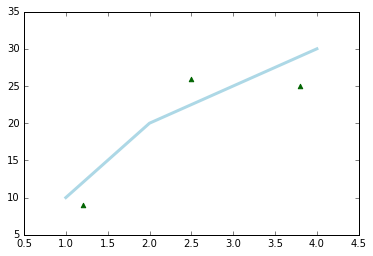

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
ax.set_xlim(0.5, 4.5)

### Axes methods vs. pyplot

Interestingly, just about all methods of an `Axes` object exist as a function in the `pyplot` module (and vice-versa). For example, when calling `plt.xlim(1, 10)`, `pyplot` calls `x.set_xlim(1, 10)` on whichever `Axes` is "current". Here is an equivalent version of the above example using just pyplot:

(0.5, 4.5)

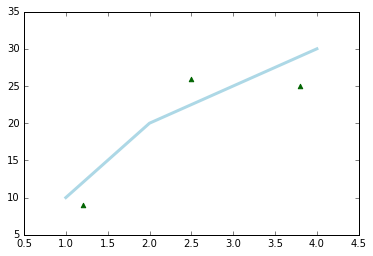

In [7]:
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
plt.xlim(0.5, 4.5)

### Multiple Axes

We've mentioned before that a figure can have more than one `Axes` on it. If you want your axes to be on a regular grid system, then it's easiest to use `plt.subplots(...)` to create a figure and add the axes to it automatically.

For example:

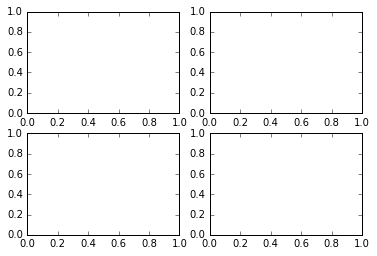

In [8]:
fig, axes = plt.subplots(2, 2) # nrows=2, ncols=2

`plt.subplots(...)` created a new figure and added 4 subplots to it. The axes object that was returned is a 2D numpy array. Each item in the array is one of the subplots. They're laid out as you see them on the figure.

Therefore, when we want to work with one of these axes, we can index the axes array and use that item's methods.

For example:

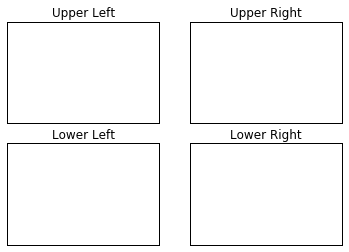

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

# To iterate over all items in a multidimensional numpy array, 
# use the `flat` attribute
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])

When `plt.subplots` is called with no arguments, it creates a new figure with a single subplot. So this will be our default way of creating a figure and axes.

## Exercise

Try to reproduce the figure shown below. Can you figure out what to do next to plot `y1`, `y2`, and `y3` vs `x` on one figure?

*Tip* when you've finished plotting, call `fig.tight_layout()` to fix the layout.

![Reproduce me](https://raw.githubusercontent.com/yoavram/AnatomyOfMatplotlib/master/images/exercise_1-1.png)

In [13]:
x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)
names = ['Signal 1', 'Signal 2', 'Signal 3']

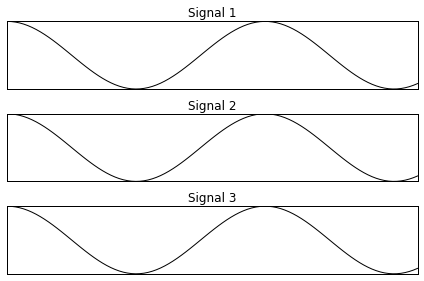

## More

- [How to speak Matplotlib](http://nbviewer.jupyter.org/github/yoavram/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part3-HowToSpeakMPL.ipynb) - control colors, markers, linestyles, plot attributes, colormaps, annotations, arrows, hatches, transforms, and rc configuration.
- [Limits, legends, & layouts](http://nbviewer.jupyter.org/github/yoavram/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part4-Limits_Legends_and_Layouts.ipynb)

# Plotting patient data

We are back to our patient infection data from the Numpy session.

In [15]:
import urllib.request

In [16]:
url = r"https://raw.githubusercontent.com/swcarpentry/python-novice-inflammation/gh-pages/data/inflammation-01.csv"
fname = "inflammation-01.csv"
urllib.request.urlretrieve(url, fname)
data = np.loadtxt(fname, delimiter=',')
print(data)

[[ 0.  0.  1. ...,  3.  0.  0.]
 [ 0.  1.  2. ...,  1.  0.  1.]
 [ 0.  1.  1. ...,  2.  1.  1.]
 ..., 
 [ 0.  1.  1. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  0.  2.  0.]
 [ 0.  0.  1. ...,  1.  1.  0.]]


We use two of `matplotlib`'s functions to create and display a heat map of our data:

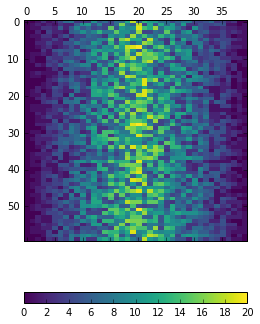

In [20]:
plt.matshow(data, aspect=0.66, cmap='viridis') 
cb = plt.colorbar(orientation='horizontal');

`aspect` controls the width of one x unit vs. one y unit.

The default colormap is Jet, read Jake VanderPlas' post [_Why People Hate Jet – and You Should Too_](https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/); We chose to use the `viridis` colormap, which will be the new default colormap in [matplotlib 2.0](https://bids.github.io/colormap/).

Blue regions in this heatmap are low values, while yellow shows high values. As we can see, inflammation rises and falls over a 40-day period (The `;` at the end of the line supresses the automatic printing of function's return value, which is an `AxesImage` in this case).

Let's take a look at the average inflammation over time:

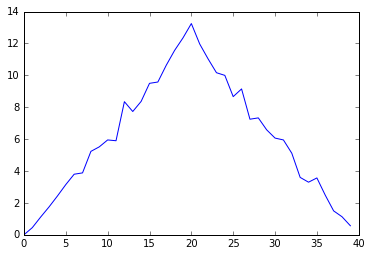

In [21]:
avg_inflammation = data.mean(axis=0)
plt.plot(avg_inflammation);

Here, we have put the average per day across all patients in the variable `avg_inflammation`, then used `plot` to create and display a line graph of those values. The result is roughly a linear rise and fall, which is suspicious: based on other studies, we expect a sharper rise and slower fall. Let's have a look at two other statistics:

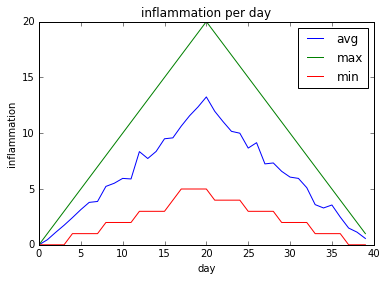

In [22]:
plt.plot(avg_inflammation, label='avg')
plt.plot(data.max(axis=0), label='max')
plt.plot(data.min(axis=0), label='min')
plt.title('inflammation per day')
plt.xlabel('day')
plt.ylabel('inflammation')
plt.legend();

The maximum value rises and falls perfectly smoothly, while the minimum seems to be a step function. Neither result seems particularly likely, so either there's a mistake in our calculations or something is wrong with our data.

`matplotlib` has many more plotting commands. For example, we can calculate the _stadard deviation of the mean_ (`sem`) which is defined as the standard deviation of the sample divided by the square root of the number of the samples:
$$
\sqrt{\frac{\sum_i{(x_{i=1}^{n} - \mu)^2}}{N}}
$$
This can be calculated using the method `std` and the function `sqrt`. 

Note that when calculating the standard deviation of a sample, the degrees of freedom is $n-1$ - this is represented by the `ddof=1` argument to `std`.

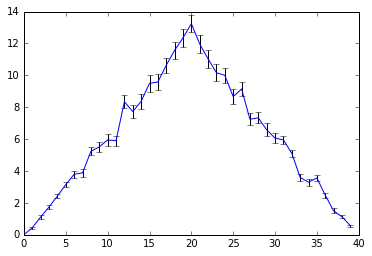

In [26]:
n_patients, n_days = data.shape
sem_inflammation = data.std(axis=0, ddof=1) / np.sqrt(n_patients)
plt.errorbar(
    x=range(n_days), 
    y=avg_inflammation, 
    yerr=sem_inflammation, 
    ecolor='k'
);

## Exercise

In a previous exercise we calculated the day in which each patient had the most inflammation.

Let's plot it now - make a scatter plot using the `scatter` command, with patient number on x-axis and day of max inflammation on y-axis.
Don't forget to add axis labels with `xlabel` and `ylabel`!

# References
- Slides: [Introduction to NumPy, SciPy, and matplotlib](https://speakerdeck.com/cfinch/introduction-to-numpy-scipy-and-matplotlib) by Craig Finch.
- Notebooks: [Long Matplotlib tutorial](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb), [IPython-Matplotlib gallery](https://github.com/rasbt/matplotlib-gallery)
- [Why People Hate Jet – and You Should Too](https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/)
- Jake Vanderplas's [Minesweeper in Matplotlib](https://jakevdp.github.io/blog/2012/12/06/minesweeper-in-matplotlib/), [Quaternions and Key Bindings: Simple 3D Visualization in Matplotlib](http://jakevdp.github.io/blog/2012/11/24/simple-3d-visualization-in-matplotlib/) and [3D Interactive Rubik's Cube in Python](http://jakevdp.github.io/blog/2012/11/26/3d-interactive-rubiks-cube-in-python/) are amazing examples of what can be done with Matplotlib beyond simple plots and using a GUI.

## Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com) and is part of the [_Python for Engineers_](https://github.com/yoavram/Py4Eng) course.

The notebook was written using [Python](http://python.org/) 3.6.0, [IPython](http://ipython.org/) 5.2.2, [Jupyter](http://jupyter.org) 4.3.0.

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)